Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0534 - val_loss: 0.0477
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0456 - val_loss: 0.0423
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0411 - val_loss: 0.0376
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0362 - val_loss: 0.0330
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317 - val_loss: 0.0281
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0268 - val_loss: 0.0233
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0228 - val_loss: 0.0190
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0183 - val_loss: 0.0156
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - val_loss: 0.0132
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 - val_loss: 0.0117
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - val_loss: 0.0108
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0107 - val_l

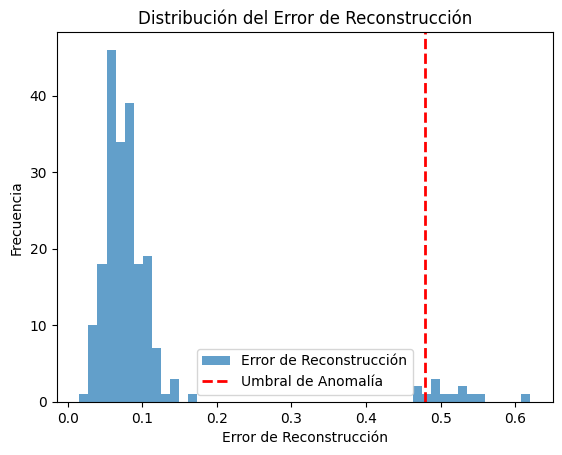

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       197
           1       1.00      0.85      0.92        13

    accuracy                           0.99       210
   macro avg       0.99      0.92      0.96       210
weighted avg       0.99      0.99      0.99       210



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Generamos datos sintéticos simulando tráfico normal y algunas anomalías
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=(1000, 5)) # 1000 muestras normales con 5 características
anomalous_data = np.random.normal(loc=5, scale=1, size=(50, 5)) # 50 muestras anómalas

# Concatenamos los datos
X = np.vstack([normal_data, anomalous_data])
labels = np.array([0] * 1000 + [1] * 50) # 0 = Normal, 1 = Anomalía

# Normalizamos los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2, random_state=42)

# Definimos la arquitectura del Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 2 # Comprimimos los datos a 2 dimensiones
input_layer = keras.layers.Input(shape=(input_dim,))
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = keras.layers.Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = keras.models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenamos el Autoencoder solo con datos normales
autoencoder.fit(X_train[y_train == 0], X_train[y_train == 0],
                epochs=50, batch_size=16, shuffle=True, validation_data=(X_test[y_test == 0], X_test[y_test == 0]))

# Calculamos el error de reconstrucción para el conjunto de prueba
X_test_pred = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(X_test - X_test_pred), axis=1)

# Establecemos un umbral para detectar anomalías
threshold = np.percentile(reconstruction_error, 95)
anomaly_predictions = (reconstruction_error > threshold).astype(int)

# Visualizamos los resultados
plt.hist(reconstruction_error, bins=50, alpha=0.7, label='Error de Reconstrucción')
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2, label='Umbral de Anomalía')
plt.xlabel('Error de Reconstrucción')
plt.ylabel('Frecuencia')
plt.title('Distribución del Error de Reconstrucción')
plt.legend()
plt.show()

# Evaluamos la detección de anomalías
from sklearn.metrics import classification_report
print(classification_report(y_test, anomaly_predictions))
